# 第26讲 统计分析实例：网站访问日志

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

## 0. 数据准备

In [2]:
path = './datas/crazyant/access_log/'
files = os.listdir(path)

In [3]:
df_raws = [pd.read_csv(path + file, sep=' ', header=None, error_bad_lines=False) for file in files]

b'Skipping line 2245: expected 10 fields, saw 16\nSkipping line 2889: expected 10 fields, saw 14\nSkipping line 2890: expected 10 fields, saw 14\nSkipping line 2891: expected 10 fields, saw 13\nSkipping line 2892: expected 10 fields, saw 13\nSkipping line 2900: expected 10 fields, saw 11\nSkipping line 2902: expected 10 fields, saw 11\nSkipping line 3790: expected 10 fields, saw 14\nSkipping line 3791: expected 10 fields, saw 14\nSkipping line 3792: expected 10 fields, saw 13\nSkipping line 3793: expected 10 fields, saw 13\nSkipping line 3833: expected 10 fields, saw 11\nSkipping line 3835: expected 10 fields, saw 11\nSkipping line 9936: expected 10 fields, saw 16\n'
b'Skipping line 11748: expected 10 fields, saw 11\nSkipping line 11750: expected 10 fields, saw 11\n'


In [4]:
df = pd.concat(df_raws, ignore_index=True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,106.11.153.226,-,-,[02/Dec/2019:22:40:18,+0800],GET /740.html?replytocom=1194 HTTP/1.0,200,13446,-,YisouSpider
1,42.156.254.60,-,-,[02/Dec/2019:22:40:23,+0800],POST /wp-json/wordpress-popular-posts/v1/popul...,201,55,http://www.crazyant.net/740.html?replytocom=1194,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
2,106.11.159.254,-,-,[02/Dec/2019:22:40:27,+0800],GET /576.html HTTP/1.0,200,13461,-,YisouSpider
3,106.11.157.254,-,-,[02/Dec/2019:22:40:28,+0800],GET /?lwfcdw=t9n2d3&oqzohc=m5e7j1&oubyvq=iab6a...,200,10485,-,YisouSpider
4,42.156.137.109,-,-,[02/Dec/2019:22:40:30,+0800],POST /wp-json/wordpress-popular-posts/v1/popul...,201,55,http://www.crazyant.net/576.html,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...


In [5]:
df = df[[0, 3, 6, 9]].copy()
df.head(5)

,0,3,6,9
0,106.11.153.226,[02/Dec/2019:22:40:18,200,YisouSpider
1,42.156.254.60,[02/Dec/2019:22:40:23,201,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
2,106.11.159.254,[02/Dec/2019:22:40:27,200,YisouSpider
3,106.11.157.254,[02/Dec/2019:22:40:28,200,YisouSpider
4,42.156.137.109,[02/Dec/2019:22:40:30,201,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...


In [6]:
df.columns = ['ip', 'stime', 'status', 'client']
df.head(5)

,ip,stime,status,client
0,106.11.153.226,[02/Dec/2019:22:40:18,200,YisouSpider
1,42.156.254.60,[02/Dec/2019:22:40:23,201,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
2,106.11.159.254,[02/Dec/2019:22:40:27,200,YisouSpider
3,106.11.157.254,[02/Dec/2019:22:40:28,200,YisouSpider
4,42.156.137.109,[02/Dec/2019:22:40:30,201,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...


## 1. 爬虫

In [7]:
df['is_spider'] = df['client'].str.lower().str.contains('spider')
labels = ['Normal', 'Spider']
props = df['is_spider'].value_counts()

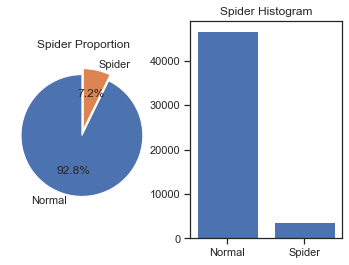

In [8]:
fig, axes = plt.subplots(1, 2)
axes[0].pie(
    props,
    labels = labels,
    shadow = False,
    explode = (0.1, 0),
    startangle = 90,
    autopct = '%1.1f%%'
)
axes[1].bar(labels, props)
axes[0].set_title('Spider Proportion')
axes[1].set_title('Spider Histogram')
plt.show()

## 2. 状态码

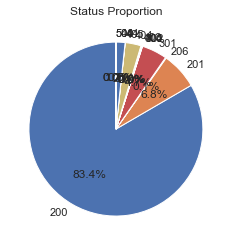

In [9]:
df_status = df.groupby("status").size()
plt.pie(
    df_status,
    labels = df_status.index,
    shadow = False,
    startangle = 90,
    autopct = '%1.1f%%'
)
plt.title('Status Proportion')
plt.show()

## 3. 访问流量

In [10]:
df['stime'] = pd.to_datetime(df['stime'].str[1:], format='%d/%b/%Y:%H:%M:%S')
df.head(5)

,ip,stime,status,client,is_spider
0,106.11.153.226,2019-12-02 22:40:18,200,YisouSpider,True
1,42.156.254.60,2019-12-02 22:40:23,201,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,True
2,106.11.159.254,2019-12-02 22:40:27,200,YisouSpider,True
3,106.11.157.254,2019-12-02 22:40:28,200,YisouSpider,True
4,42.156.137.109,2019-12-02 22:40:30,201,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,True


In [11]:
df.set_index('stime', inplace=True)
df.sort_index(inplace=True)

<AxesSubplot:xlabel='stime'>

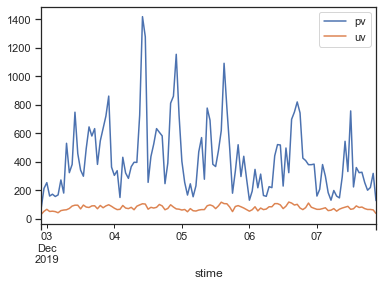

In [12]:
# 按小时统计
df1 = df.resample('H')['ip'].agg(pv=np.size, uv=pd.Series.nunique)
df1.plot()

<AxesSubplot:xlabel='stime'>

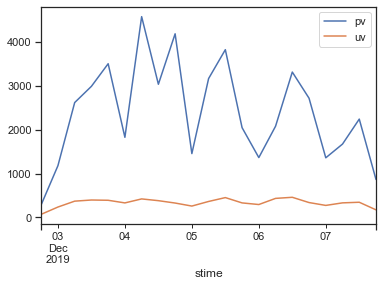

In [13]:
# 按6小时统计
df2 = df.resample('6H')['ip'].agg(pv=np.size, uv=pd.Series.nunique)
df2.plot()

<AxesSubplot:xlabel='stime'>

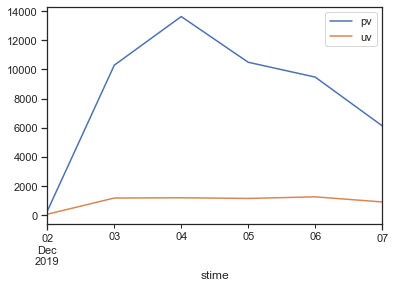

In [14]:
# 按天统计
df3 = df.resample('D')['ip'].agg(pv=np.size, uv=pd.Series.nunique)
df3.plot()